In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

data = np.genfromtxt("13-month smoothed monthly total sunspot number 1-1749 to now.csv", delimiter=';')
år = data[:,0]
måned = data[:,1]
dato_fraction = data[:,2]
SN = data[:,3]
std = data[:,4]
N = data[:,5]
definite = data[:,6]

In [3]:
SN2 = []
dato_fraction2 = []
usikkerhed2 = []

for i in range(len(dato_fraction)):
    if N[i] > 0 and SN[i] >= 0:
        SN2.append(SN[i])
        dato_fraction2.append(dato_fraction[i])
        usikkerhed2.append(abs(std[i]/np.sqrt(N[i])))

SN2 = np.array(SN2)
dato_fraction2 = np.array(dato_fraction2)
usikkerhed2 = np.array(usikkerhed2)

#Dage taget fra
print(f'Antallet af datapunkter der er taget fra: {len(dato_fraction)-len(dato_fraction2)}')
print(dato_fraction2[-1])

Antallet af datapunkter der er taget fra: 835
2023.538


-32.304183658617056 0.05128489506064685 -2.247181277908979 28.684902595561873
1818.042


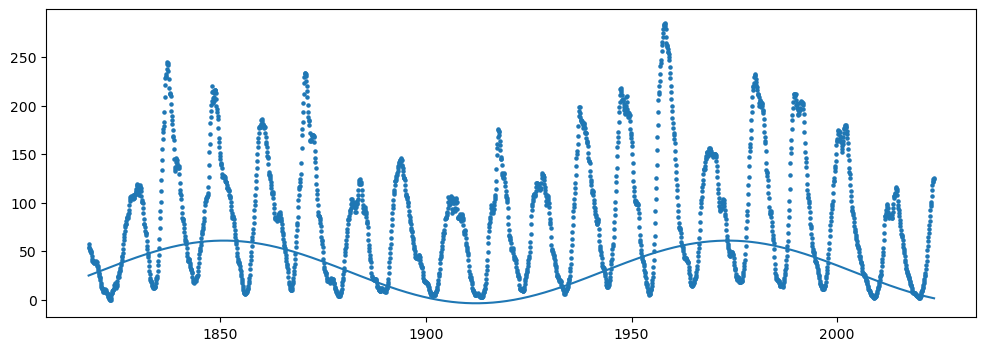

In [15]:
#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , dato_fraction2 , SN2 , sigma=usikkerhed2 , absolute_sigma=True, p0=[300,1/20,1,1])

xx = np.linspace(dato_fraction2[0] , dato_fraction2[-1] , len(SN2))
yy = sin1(xx , *Var1)


plt.figure(figsize=(12,4))
plt.scatter(dato_fraction2 , SN2 , s=5)
plt.plot(xx , yy)
print(*Var1)
print(dato_fraction2[0])